# Simple linear regression

## Import the relevant libraries

In [11]:
import numpy as np             # Importa la biblioteca NumPy para operaciones numéricas
import pandas as pd            # Importa la biblioteca Pandas para manipulación y análisis de datos
import matplotlib.pyplot as plt       # Importa la biblioteca Matplotlib para visualización de datos
import statsmodels.api as sm   # Importa la biblioteca statsmodels para análisis estadístico

## Load the data

In [12]:
# Cargar los datos desde el archivo CSV
data = pd.read_csv('real_estate_price_size.csv')

In [3]:
# Visualizar las primeras filas del DataFrame para verificar la carga de datos
data.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [13]:
# Obtener estadísticas descriptivas del DataFrame
data.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


## Create the regression

### Declare the dependent and the independent variables

In [17]:
# Definir la variable dependiente 'price' que representa el precio de la propiedad
y = data['price']

# Definir la variable independiente 'size' que representa el tamaño de la propiedad
x1 = data['size']

### Explore the data

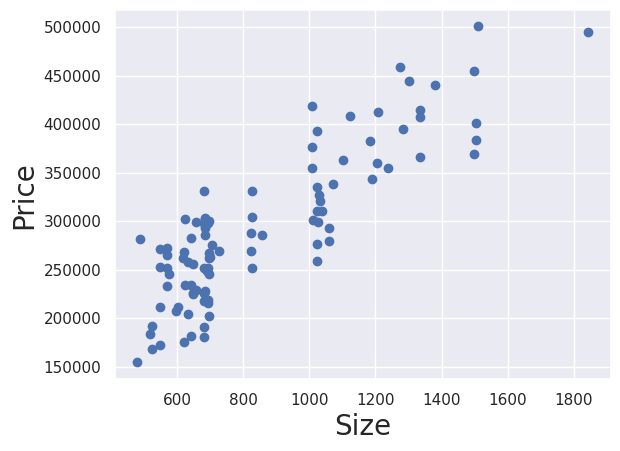

In [9]:
# Graficar los datos utilizando un gráfico de dispersión
plt.scatter(data['size'], data['price'])
plt.xlabel('Size', fontsize=20)  # Etiqueta del eje x
plt.ylabel('Price', fontsize=20) # Etiqueta del eje y
plt.show()

### Regression itself

In [15]:
# Añadir una columna de unos (constantes) a la matriz de características
x = sm.add_constant(data['size'])
# Ajustar un modelo de regresión lineal utilizando OLS (Mínimos Cuadrados Ordinarios)
results = sm.OLS(data['price'], x).fit()
# Mostrar un resumen detallado de los resultados del modelo de regresión lineal
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           8.13e-31
Time:                        11:43:59   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

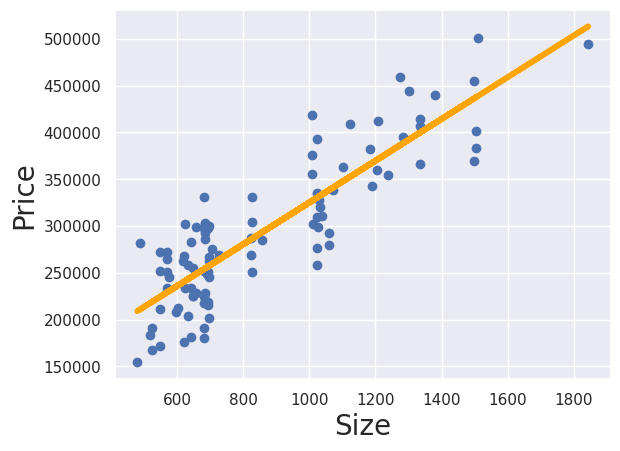

In [16]:
# Graficar los datos y la línea de regresión lineal ajustada
plt.scatter(data['size'], data['price'])  # Gráfico de dispersión de los datos
# Calcular los valores predichos de la variable dependiente (price) utilizando la ecuación de la regresión lineal
yhat = data['size']*223.1787 + 101900
# Dibujar la línea de regresión lineal en el gráfico
plt.plot(data['size'], yhat, lw=4, c='orange', label ='regression line')
plt.xlabel('Size', fontsize = 20)  # Etiqueta del eje x
plt.ylabel('Price', fontsize = 20) # Etiqueta del eje y
plt.legend()  # Mostrar la leyenda
plt.show()